In [26]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import warnings
warnings.filterwarnings("ignore")

### Image Properties

In [27]:
Image_Width=64
Image_Height=64
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

### Prepare for training

In [28]:
filenames=os.listdir("finalprojectdataset\pet_train")

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
        
df=pd.DataFrame({'filename':filenames,'category':categories})

In [29]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.11.jpg,0
4,cat.12.jpg,0


### Creating CNN

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

# Initialization
model=Sequential()

# C1 Convolutional Layer
model.add(Conv2D(32,(5,5),activation='relu',
                 input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())

# S2 Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.4))

# C3 Convolutional Layer
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(BatchNormalization())

# S4 Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.4))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Output Layer with softmax activation
model.add(Dense(2,activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
batch_normalization_4 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        51264     
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)       

### Augmentation process

In [31]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15


train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,"finalprojectdataset\pet_train",
                                                    x_col='filename',y_col='category',
                                                    target_size=Image_Size,
                                                    class_mode='categorical',batch_size=batch_size)



validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validate_df,"finalprojectdataset\pet_train",
                                                              x_col='filename',y_col='category',
                                                              target_size=Image_Size,
                                                              class_mode='categorical',batch_size=batch_size)


test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = train_datagen.flow_from_dataframe(train_df,"finalprojectdataset\pet_test",
                                                   x_col='filename',y_col='category',
                                                   target_size=Image_Size,
                                                   class_mode='categorical',batch_size=batch_size)

Found 32 validated image filenames belonging to 2 classes.
Found 8 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 0 classes.


### Train the data

In [32]:
epochs=100
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)


Epoch 1/100
2/2 [==============================] - 1s 537ms/step - loss: 1.4074 - accuracy: 0.4667 - val_loss: 1.6918 - val_accuracy: 0.3750
Epoch 2/100
2/2 [==============================] - 0s 160ms/step - loss: 0.6676 - accuracy: 0.7059 - val_loss: 1.2172 - val_accuracy: 0.2500
Epoch 3/100
2/2 [==============================] - 0s 132ms/step - loss: 0.7010 - accuracy: 0.7059 - val_loss: 1.0896 - val_accuracy: 0.3750
Epoch 4/100
2/2 [==============================] - 0s 219ms/step - loss: 0.8128 - accuracy: 0.7000 - val_loss: 1.1574 - val_accuracy: 0.3750
Epoch 5/100
2/2 [==============================] - 0s 59ms/step - loss: 0.6155 - accuracy: 0.5000 - val_loss: 1.0472 - val_accuracy: 0.3750
Epoch 6/100
2/2 [==============================] - 1s 258ms/step - loss: 0.7317 - accuracy: 0.6000 - val_loss: 1.2650 - val_accuracy: 0.3750
Epoch 7/100
2/2 [==============================] - 0s 217ms/step - loss: 0.6270 - accuracy: 0.7667 - val_loss: 0.9465 - val_accuracy: 0.2500
Epoch 8/100
2/

Epoch 59/100
2/2 [==============================] - 0s 66ms/step - loss: 0.5655 - accuracy: 0.7500 - val_loss: 1.7227 - val_accuracy: 0.3750
Epoch 60/100
2/2 [==============================] - 0s 228ms/step - loss: 0.4241 - accuracy: 0.7000 - val_loss: 1.8253 - val_accuracy: 0.3750
Epoch 61/100
2/2 [==============================] - 0s 201ms/step - loss: 0.2826 - accuracy: 0.9333 - val_loss: 2.0379 - val_accuracy: 0.3750
Epoch 62/100
2/2 [==============================] - 0s 168ms/step - loss: 0.6594 - accuracy: 0.8235 - val_loss: 2.0969 - val_accuracy: 0.3750
Epoch 63/100
2/2 [==============================] - 0s 130ms/step - loss: 0.7313 - accuracy: 0.8235 - val_loss: 2.2875 - val_accuracy: 0.3750
Epoch 64/100
2/2 [==============================] - 0s 149ms/step - loss: 0.1768 - accuracy: 0.9412 - val_loss: 2.2947 - val_accuracy: 0.3750
Epoch 65/100
2/2 [==============================] - 0s 216ms/step - loss: 0.5175 - accuracy: 0.8000 - val_loss: 3.7858 - val_accuracy: 0.3750
Epoch 6

In [33]:
epochs=200
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/200
2/2 [==============================] - 1s 266ms/step - loss: 0.4295 - accuracy: 0.7333 - val_loss: 5.3763 - val_accuracy: 0.3750
Epoch 2/200
2/2 [==============================] - 0s 217ms/step - loss: 0.6338 - accuracy: 0.7059 - val_loss: 4.6752 - val_accuracy: 0.3750
Epoch 3/200
2/2 [==============================] - 0s 133ms/step - loss: 0.7101 - accuracy: 0.8235 - val_loss: 3.8019 - val_accuracy: 0.3750
Epoch 4/200
2/2 [==============================] - 0s 128ms/step - loss: 0.8663 - accuracy: 0.8824 - val_loss: 3.9184 - val_accuracy: 0.3750
Epoch 5/200
2/2 [==============================] - 0s 145ms/step - loss: 0.4628 - accuracy: 0.6471 - val_loss: 3.1596 - val_accuracy: 0.3750
Epoch 6/200
2/2 [==============================] - 0s 231ms/step - loss: 0.4693 - accuracy: 0.8000 - val_loss: 2.8778 - val_accuracy: 0.3750
Epoch 7/200
2/2 [==============================] - 0s 206ms/step - loss: 0.2350 - accuracy: 0.9333 - val_loss: 2.8301 - val_accuracy: 0.3750
Epoch 8/200
2

Epoch 59/200
2/2 [==============================] - 0s 64ms/step - loss: 0.0963 - accuracy: 1.0000 - val_loss: 0.8696 - val_accuracy: 0.3750
Epoch 60/200
2/2 [==============================] - 0s 233ms/step - loss: 0.4111 - accuracy: 0.8333 - val_loss: 1.0312 - val_accuracy: 0.3750
Epoch 61/200
2/2 [==============================] - 0s 142ms/step - loss: 0.9421 - accuracy: 0.7059 - val_loss: 0.9614 - val_accuracy: 0.5000
Epoch 62/200
2/2 [==============================] - 0s 231ms/step - loss: 0.2368 - accuracy: 0.9333 - val_loss: 1.5540 - val_accuracy: 0.2500
Epoch 63/200
2/2 [==============================] - 0s 173ms/step - loss: 0.3731 - accuracy: 0.8824 - val_loss: 1.6846 - val_accuracy: 0.2500
Epoch 64/200
2/2 [==============================] - 0s 148ms/step - loss: 0.2097 - accuracy: 0.9412 - val_loss: 1.7183 - val_accuracy: 0.2500
Epoch 65/200
2/2 [==============================] - 0s 233ms/step - loss: 0.1748 - accuracy: 0.9333 - val_loss: 1.7657 - val_accuracy: 0.2500
Epoch 6

2/2 [==============================] - 0s 118ms/step - loss: 0.8945 - accuracy: 0.7500 - val_loss: 1.4089 - val_accuracy: 0.3750
Epoch 117/200
2/2 [==============================] - 0s 240ms/step - loss: 0.2508 - accuracy: 0.9000 - val_loss: 1.4303 - val_accuracy: 0.3750
Epoch 118/200
2/2 [==============================] - 0s 131ms/step - loss: 0.2312 - accuracy: 0.8824 - val_loss: 1.4972 - val_accuracy: 0.3750
Epoch 119/200
2/2 [==============================] - 0s 219ms/step - loss: 0.2534 - accuracy: 0.8667 - val_loss: 1.4980 - val_accuracy: 0.3750
Epoch 120/200
2/2 [==============================] - 0s 131ms/step - loss: 0.1018 - accuracy: 1.0000 - val_loss: 1.5658 - val_accuracy: 0.3750
Epoch 121/200
2/2 [==============================] - 0s 130ms/step - loss: 0.4857 - accuracy: 0.7647 - val_loss: 1.3604 - val_accuracy: 0.3750
Epoch 122/200
2/2 [==============================] - 0s 134ms/step - loss: 0.3063 - accuracy: 0.8824 - val_loss: 1.4764 - val_accuracy: 0.3750
Epoch 123/200

2/2 [==============================] - 0s 138ms/step - loss: 0.3808 - accuracy: 0.9412 - val_loss: 1.4934 - val_accuracy: 0.3750
Epoch 174/200
2/2 [==============================] - 0s 214ms/step - loss: 0.2805 - accuracy: 0.9333 - val_loss: 1.6507 - val_accuracy: 0.1250
Epoch 175/200
2/2 [==============================] - 0s 133ms/step - loss: 0.0951 - accuracy: 1.0000 - val_loss: 1.7014 - val_accuracy: 0.1250
Epoch 176/200
2/2 [==============================] - 0s 213ms/step - loss: 0.1296 - accuracy: 0.9667 - val_loss: 1.6959 - val_accuracy: 0.1250
Epoch 177/200
2/2 [==============================] - 0s 129ms/step - loss: 0.0950 - accuracy: 0.9412 - val_loss: 1.5288 - val_accuracy: 0.1250
Epoch 178/200
2/2 [==============================] - 0s 211ms/step - loss: 0.1326 - accuracy: 0.9667 - val_loss: 1.7395 - val_accuracy: 0.1250
Epoch 179/200
2/2 [==============================] - 0s 58ms/step - loss: 0.4892 - accuracy: 0.7500 - val_loss: 1.7627 - val_accuracy: 0.1250
Epoch 180/200


In [34]:
epochs=300
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/300
2/2 [==============================] - 0s 177ms/step - loss: 0.1360 - accuracy: 1.0000 - val_loss: 1.8653 - val_accuracy: 0.1250
Epoch 2/300
2/2 [==============================] - 0s 224ms/step - loss: 0.3633 - accuracy: 0.7667 - val_loss: 1.7402 - val_accuracy: 0.3750
Epoch 3/300
2/2 [==============================] - 0s 133ms/step - loss: 0.5711 - accuracy: 0.9412 - val_loss: 1.7539 - val_accuracy: 0.3750
Epoch 4/300
2/2 [==============================] - 0s 229ms/step - loss: 0.6720 - accuracy: 0.7667 - val_loss: 1.6322 - val_accuracy: 0.3750
Epoch 5/300
2/2 [==============================] - 0s 197ms/step - loss: 0.1327 - accuracy: 0.8824 - val_loss: 1.6222 - val_accuracy: 0.3750
Epoch 6/300
2/2 [==============================] - 0s 139ms/step - loss: 0.1783 - accuracy: 0.9412 - val_loss: 1.6209 - val_accuracy: 0.3750
Epoch 7/300
2/2 [==============================] - 0s 145ms/step - loss: 0.1934 - accuracy: 0.8824 - val_loss: 1.8739 - val_accuracy: 0.1250
Epoch 8/300
2

Epoch 59/300
2/2 [==============================] - 0s 216ms/step - loss: 0.2566 - accuracy: 0.9000 - val_loss: 2.1136 - val_accuracy: 0.2500
Epoch 60/300
2/2 [==============================] - 0s 127ms/step - loss: 0.7681 - accuracy: 0.8824 - val_loss: 2.1037 - val_accuracy: 0.2500
Epoch 61/300
2/2 [==============================] - 0s 242ms/step - loss: 0.1469 - accuracy: 1.0000 - val_loss: 1.9990 - val_accuracy: 0.3750
Epoch 62/300
2/2 [==============================] - 0s 206ms/step - loss: 0.0865 - accuracy: 1.0000 - val_loss: 1.8261 - val_accuracy: 0.3750
Epoch 63/300
2/2 [==============================] - 0s 133ms/step - loss: 0.0926 - accuracy: 1.0000 - val_loss: 1.7404 - val_accuracy: 0.2500
Epoch 64/300
2/2 [==============================] - 0s 131ms/step - loss: 0.1630 - accuracy: 0.9412 - val_loss: 2.9493 - val_accuracy: 0.2500
Epoch 65/300
2/2 [==============================] - 0s 142ms/step - loss: 0.2092 - accuracy: 0.9412 - val_loss: 2.2611 - val_accuracy: 0.2500
Epoch 

2/2 [==============================] - 0s 216ms/step - loss: 0.1111 - accuracy: 0.9667 - val_loss: 1.8159 - val_accuracy: 0.2500
Epoch 117/300
2/2 [==============================] - 0s 123ms/step - loss: 0.1523 - accuracy: 0.9412 - val_loss: 1.8362 - val_accuracy: 0.2500
Epoch 118/300
2/2 [==============================] - 1s 264ms/step - loss: 0.0814 - accuracy: 1.0000 - val_loss: 2.6431 - val_accuracy: 0.2500
Epoch 119/300
2/2 [==============================] - 0s 197ms/step - loss: 0.3295 - accuracy: 0.9412 - val_loss: 2.5666 - val_accuracy: 0.2500
Epoch 120/300
2/2 [==============================] - 0s 129ms/step - loss: 0.0716 - accuracy: 1.0000 - val_loss: 2.4810 - val_accuracy: 0.2500
Epoch 121/300
2/2 [==============================] - 0s 211ms/step - loss: 0.0857 - accuracy: 0.9667 - val_loss: 2.6807 - val_accuracy: 0.2500
Epoch 122/300
2/2 [==============================] - 0s 171ms/step - loss: 0.4482 - accuracy: 0.8824 - val_loss: 2.4516 - val_accuracy: 0.2500
Epoch 123/300

2/2 [==============================] - 0s 199ms/step - loss: 0.0680 - accuracy: 0.9412 - val_loss: 1.2209 - val_accuracy: 0.6250
Epoch 174/300
2/2 [==============================] - 0s 145ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 1.1512 - val_accuracy: 0.6250
Epoch 175/300
2/2 [==============================] - 0s 151ms/step - loss: 0.0530 - accuracy: 1.0000 - val_loss: 1.1669 - val_accuracy: 0.5000
Epoch 176/300
2/2 [==============================] - 0s 138ms/step - loss: 0.5696 - accuracy: 0.9412 - val_loss: 1.1185 - val_accuracy: 0.5000
Epoch 177/300
2/2 [==============================] - 0s 230ms/step - loss: 0.0755 - accuracy: 0.9667 - val_loss: 1.2777 - val_accuracy: 0.3750
Epoch 178/300
2/2 [==============================] - 0s 218ms/step - loss: 0.0748 - accuracy: 1.0000 - val_loss: 1.2924 - val_accuracy: 0.5000
Epoch 179/300
2/2 [==============================] - 0s 172ms/step - loss: 0.3896 - accuracy: 0.8824 - val_loss: 1.2728 - val_accuracy: 0.6250
Epoch 180/300

2/2 [==============================] - 0s 227ms/step - loss: 0.0521 - accuracy: 1.0000 - val_loss: 2.8939 - val_accuracy: 0.2500
Epoch 231/300
2/2 [==============================] - 0s 142ms/step - loss: 0.0461 - accuracy: 1.0000 - val_loss: 2.6161 - val_accuracy: 0.2500
Epoch 232/300
2/2 [==============================] - 0s 170ms/step - loss: 0.3626 - accuracy: 0.8824 - val_loss: 3.4371 - val_accuracy: 0.2500
Epoch 233/300
2/2 [==============================] - 0s 230ms/step - loss: 0.0651 - accuracy: 1.0000 - val_loss: 3.0693 - val_accuracy: 0.3750
Epoch 234/300
2/2 [==============================] - 0s 137ms/step - loss: 0.5410 - accuracy: 0.9412 - val_loss: 2.4492 - val_accuracy: 0.3750
Epoch 235/300
2/2 [==============================] - 0s 212ms/step - loss: 0.1160 - accuracy: 0.9667 - val_loss: 2.0356 - val_accuracy: 0.3750
Epoch 236/300
2/2 [==============================] - 0s 177ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 2.8587 - val_accuracy: 0.3750
Epoch 237/300

2/2 [==============================] - 0s 160ms/step - loss: 0.1149 - accuracy: 0.9412 - val_loss: 0.9475 - val_accuracy: 0.7500
Epoch 288/300
2/2 [==============================] - 0s 134ms/step - loss: 0.5067 - accuracy: 0.9412 - val_loss: 0.7824 - val_accuracy: 0.6250
Epoch 289/300
2/2 [==============================] - 0s 240ms/step - loss: 0.4443 - accuracy: 0.9412 - val_loss: 0.9141 - val_accuracy: 0.6250
Epoch 290/300
2/2 [==============================] - 0s 153ms/step - loss: 0.0358 - accuracy: 1.0000 - val_loss: 1.1352 - val_accuracy: 0.5000
Epoch 291/300
2/2 [==============================] - 0s 236ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.8388 - val_accuracy: 0.6250
Epoch 292/300
2/2 [==============================] - 0s 128ms/step - loss: 0.6078 - accuracy: 0.8824 - val_loss: 2.0086 - val_accuracy: 0.6250
Epoch 293/300
2/2 [==============================] - 0s 219ms/step - loss: 0.2520 - accuracy: 0.9667 - val_loss: 0.8300 - val_accuracy: 0.7500
Epoch 294/300

### Report on the final accuracy and loss on the evaluation data

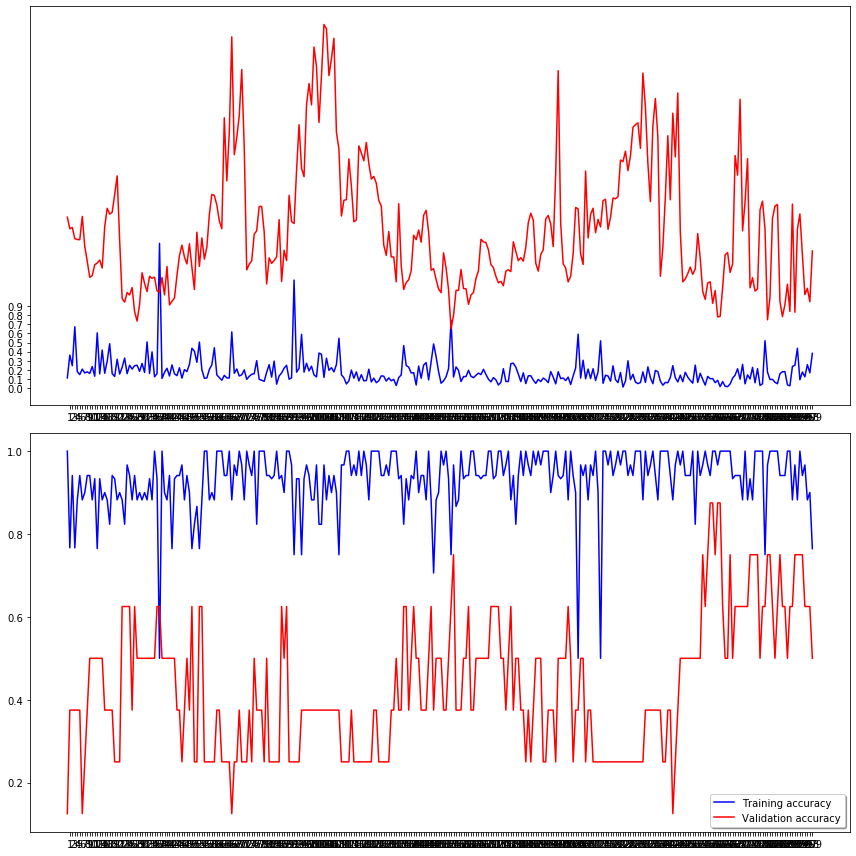

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()